<a href="https://colab.research.google.com/github/MaJu502/proyectoDL/blob/main/modelo_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Deep Learning
- Diego Cordova 20212
- Marco Jurado 20308
- Cristian Aguirre 20231
- Paola Contreras 20213
- Paola de Leon 20361

## Carga de Dataset

In [1]:
!gdown 1BoNWFSXxtN74PgLcBxfGWyeKUOfevQEP

Downloading...
From: https://drive.google.com/uc?id=1BoNWFSXxtN74PgLcBxfGWyeKUOfevQEP
To: /content/kaggle.json
100% 64.0/64.0 [00:00<00:00, 383kB/s]


In [2]:
! pip install kaggle

In [3]:
!ls -a /root/

.   .bashrc  .config   .jupyter  .launchpadlib	.npm	  .tmux.conf
..  .cache   .ipython  .keras	 .local		.profile  .wget-hsts


In [4]:
!mkdir /root/.kaggle/

In [5]:
!mv /content/kaggle.json /root/.kaggle/


In [6]:
ls /root/.kaggle/


kaggle.json


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

100% 120M/121M [00:06<00:00, 24.8MB/s]
100% 121M/121M [00:06<00:00, 20.6MB/s]


In [9]:
%cd /content
!unzip -q face-expression-recognition-dataset.zip

/content


# Modelo

In [10]:
import os
import shutil

# Ruta de la carpeta que deseas eliminar
folder_path = './images/train/disgust'

# Elimina todas las imágenes en la carpeta
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Error al eliminar {file_path}: {e}')

# Elimina la carpeta misma
try:
    os.rmdir(folder_path)
except Exception as e:
    print(f'Error al eliminar la carpeta {folder_path}: {e}')


In [11]:
# Ruta de la carpeta que deseas eliminar
folder_path = './images/validation/disgust'

# Elimina todas las imágenes en la carpeta
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Error al eliminar {file_path}: {e}')

# Elimina la carpeta misma
try:
    os.rmdir(folder_path)
except Exception as e:
    print(f'Error al eliminar la carpeta {folder_path}: {e}')

In [23]:
import os
import random
import shutil

# Ruta de la carpeta que deseas modificar
folder_path = './images/train/happy'

# Lista de archivos en la carpeta
file_list = os.listdir(folder_path)

# Número de imágenes que deseas eliminar
num_images_to_delete = 3000

# Verifica si hay suficientes imágenes para eliminar
if len(file_list) < num_images_to_delete:
    print(f'No hay suficientes imágenes en {folder_path} para eliminar.')
else:
    # Selecciona aleatoriamente las imágenes que se eliminarán
    images_to_delete = random.sample(file_list, num_images_to_delete)

    # Elimina las imágenes seleccionadas
    for file_name in images_to_delete:
        file_path = os.path.join(folder_path, file_name)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Error al eliminar {file_path}: {e}')

    print(f'Se han eliminado {num_images_to_delete} imágenes de {folder_path}.')


Se han eliminado 3000 imágenes de ./images/train/happy.


In [24]:
import cv2
import os
import numpy as np

# Directorio raíz que contiene subdirectorios para cada emoción
root_dir = './images/train/'

# Lista de emociones
emotions = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Inicializa un diccionario para almacenar shapes únicos por emoción
unique_shapes_by_emotion = {emotion: [] for emotion in emotions}

# Itera a través de las carpetas de emociones
for emotion in emotions:
    emotion_dir = os.path.join(root_dir, emotion)
    image_files = os.listdir(emotion_dir)

    # Itera a través de los archivos de imágenes en cada carpeta de emoción
    for image_file in image_files:
        image_path = os.path.join(emotion_dir, image_file)
        image = cv2.imread(image_path)
        shape = image.shape
        if shape not in unique_shapes_by_emotion[emotion]:
            unique_shapes_by_emotion[emotion].append(shape)

# Imprime los shapes únicos por emoción
for emotion, shapes in unique_shapes_by_emotion.items():
    print(f"Shapes únicos para la emoción '{emotion}':")
    for shape in shapes:
        print(shape)


Shapes únicos para la emoción 'angry':
(48, 48, 3)
Shapes únicos para la emoción 'fear':
(48, 48, 3)
Shapes únicos para la emoción 'happy':
(48, 48, 3)
Shapes únicos para la emoción 'neutral':
(48, 48, 3)
Shapes únicos para la emoción 'sad':
(48, 48, 3)
Shapes únicos para la emoción 'surprise':
(48, 48, 3)


## Loader para el Modelo

In [25]:
import torch
from torchvision import datasets, transforms

batch_size = 128
base_path = "./images/"

# Definir transformaciones para el conjunto de entrenamiento y validación
train_transform = transforms.Compose([
    transforms.Resize((56, 56)),
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizar imágenes
])

validation_transform = transforms.Compose([
    transforms.Resize((56, 56)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizar imágenes
])

# Crear conjuntos de datos
train_dataset = datasets.ImageFolder(base_path + "train", transform=train_transform)
validation_dataset = datasets.ImageFolder(base_path + "validation", transform=validation_transform)

# Crear generadores de lotes (DataLoaders)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
for i, data in enumerate(train_loader, 0):
  print(np.array(data[0]).shape)
  break

(128, 1, 56, 56)


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.nn.modules import activation

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class Sentiment(nn.Module):
    def __init__(self, num_classes=10):
        super(Sentiment, self).__init__()

        self.convolucionales = nn.Sequential(
            # Capa convolucional 1
            # - 64 kernels de 3x3
            # - activacion ReLU
            # - MaxPooling con kernel de 2x2
            # - Dropout de 0.25
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            # Capa convolucional 2
            # - 128 kernels de 5x5
            # - activacion ReLU
            # - MaxPooling con kernel de 2x2
            # - Dropout de 0.25
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            # Capa convolucional 3
            # - 512 kernels de 3x3
            # - activacion ReLU
            # - MaxPooling con kernel de 2x2
            # - Dropout de 0.25
            nn.Conv2d(in_channels=128, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            # Capa convolucional 4 (igual a la 3)
            # - 512 kernels de 3x3
            # - activacion ReLU
            # - MaxPooling con kernel de 2x2
            # - Dropout de 0.25
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            # nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            # nn.BatchNorm2d(512),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.25),

            # nn.Conv2d(in_channels=128, out_channels=512, kernel_size=3, padding=1),
            # nn.BatchNorm2d(512),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.25),
        )

        # Fully Connected
        self.classifier = nn.Sequential(
          # Se aplanan las salidas convolucionales
          nn.Flatten(),

          # Fully Connected 1
          # - activacion ReLU
          # - Dropout de 0.25
          # nn.Linear(64 * 28 * 28, 256),
          nn.Linear(4608, 256),
          nn.BatchNorm1d(256),
          nn.ReLU(),
          nn.Dropout(0.25),

          # Fully Connected 2
          # - activacion ReLU
          # - Dropout de 0.25
          nn.Linear(256, 512),
          nn.BatchNorm1d(512),
          nn.ReLU(),
          nn.Dropout(0.25),

          # Fully Connected 3 (salida)
          # - activacion spftmax
          nn.Linear(512, num_classes),
          nn.Softmax(dim=1),
        )

    def forward(self, x):
        x = self.convolucionales(x)
        x = self.classifier(x)
        return x

modelo = Sentiment(len(emotions))
print(len(emotions))
print(modelo)

cuda:0
6
Sentiment(
  (convolucionales): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25, inplace=False)
    (10): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.25, inplace=False)
    (15): Conv2d(512, 512,

## Se preparan los datos para CUDA

In [27]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
modelo = modelo.to(device)

device_in_model = 'cpu' if False in [i.is_cuda for i in modelo.parameters()] else 'cuda'
print('model using', device_in_model)

Computation device: cuda

model using cuda


## Entreno del Modelo

In [45]:
%%time
import torch.optim as optim
import tensorflow as tf
from torch.optim.lr_scheduler import StepLR



# Función de pérdida y optimizador
# criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
# criterion = tf.keras.metrics.categorical_crossentropy()

# optimizer = optim.SGD(modelo.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(modelo.parameters(), lr=0.0001)
optimizer = optim.Adam(modelo.parameters(), lr=0.0001, weight_decay=1e-5)

# Define el scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

epochs = 5

# Entrenamiento
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = modelo(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f'\rEpoch {epoch+1} | step: {i}/{len(train_loader)-1}', end='')

    scheduler.step()
    # Evaluación en el conjunto de prueba
    with torch.no_grad():
        correct = 0
        total = 0
        predictions = []
        ground_truth = []

        for data in train_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = modelo(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'\n> Training Loss: {running_loss / len(train_loader)} | Training Accuracy: {round(100 * correct / total, 2)}%')
        correct = 0
        total = 0

        for data in validation_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = modelo(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            predictions.extend(predicted.cpu().numpy())
            ground_truth.extend(labels.cpu().numpy())

        print(f'> Validation Loss: {running_loss / len(train_loader)} | Validation Accuracy: {round(100 * correct / total, 2)}%')

print('Finished Training')

Epoch 1 | step: 198/198
> Training Loss: 1.4673225070962954 | Training Accuracy: 57.44%
> Validation Loss: 1.4673225070962954 | Validation Accuracy: 21.52%
Epoch 2 | step: 198/198
> Training Loss: 1.4650502228856686 | Training Accuracy: 57.53%
> Validation Loss: 1.4650502228856686 | Validation Accuracy: 21.06%
Epoch 3 | step: 198/198
> Training Loss: 1.463600418675485 | Training Accuracy: 57.39%
> Validation Loss: 1.463600418675485 | Validation Accuracy: 21.14%
Epoch 4 | step: 198/198
> Training Loss: 1.4621556284439623 | Training Accuracy: 57.59%
> Validation Loss: 1.4621556284439623 | Validation Accuracy: 21.45%
Epoch 5 | step: 198/198
> Training Loss: 1.4608959462774458 | Training Accuracy: 57.8%
> Validation Loss: 1.4608959462774458 | Validation Accuracy: 21.15%
Epoch 6 | step: 198/198
> Training Loss: 1.4589293074967273 | Training Accuracy: 58.28%
> Validation Loss: 1.4589293074967273 | Validation Accuracy: 20.73%
Epoch 7 | step: 198/198
> Training Loss: 1.4590940169952622 | Train

In [46]:
!pip install scikit-learn

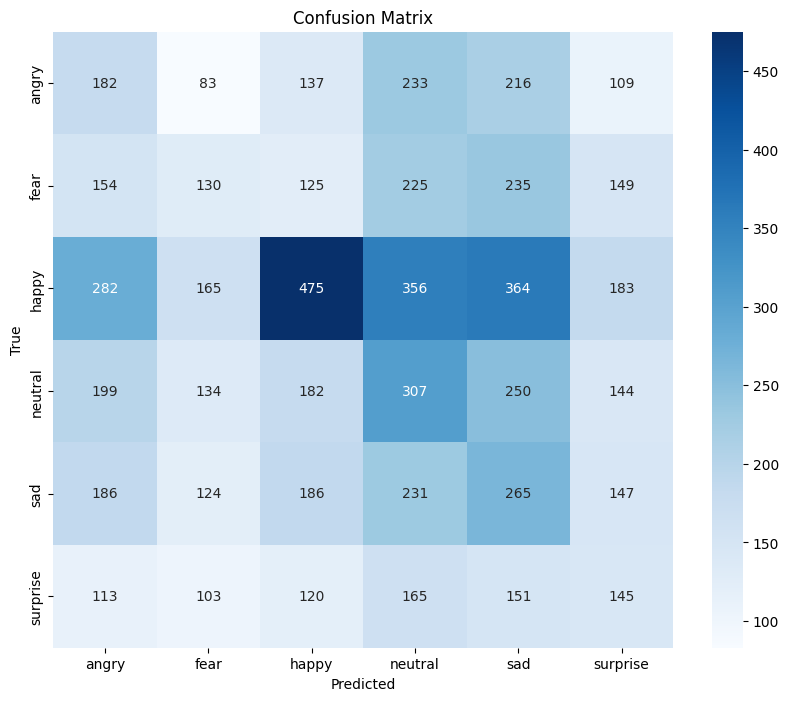

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(ground_truth, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotions, yticklabels=emotions)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import timm
from torch import nn


class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel,self).__init__()
        self.eff_net = timm.create_model('resnet34',pretrained = True,num_classes = 7)
    def forward(self,images,labels = None):
        logits = self.eff_net(images)
        if labels != None:
            loss = nn.CrossEntropyLoss()(logits,labels)
            return logits,loss
        return logits

modelo = FaceModel()

In [ ]:
%%time
import torch.optim as optim
import tensorflow as tf
from torch.optim.lr_scheduler import StepLR



# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelo.parameters(), lr=0.0001, weight_decay=1e-5)

# Define el scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

epochs = 80

# Entrenamiento
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = modelo(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f'\rEpoch {epoch+1} | step: {i}/{len(train_loader)-1}', end='')

    scheduler.step()
    # Evaluación en el conjunto de prueba
    with torch.no_grad():
        correct = 0
        total = 0
        predictions = []
        ground_truth = []

        for data in train_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = modelo(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'\n> Training Loss: {running_loss / len(train_loader)} | Training Accuracy: {round(100 * correct / total, 2)}%')
        correct = 0
        total = 0

        for data in validation_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = modelo(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            predictions.extend(predicted.cpu().numpy())
            ground_truth.extend(labels.cpu().numpy())

        print(f'> Validation Loss: {running_loss / len(train_loader)} | Validation Accuracy: {round(100 * correct / total, 2)}%')

print('Finished Training')

In [48]:
import pickle

model_filename = "model.pkl"

with open(model_filename, 'wb') as model_file:
    pickle.dump(modelo, model_file)


In [49]:
import matplotlib.pyplot as plt

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')



    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

In [50]:
plot_results(history)
best_epoch =get_best_epcoh(history)

NameError: ignored